<a href="https://colab.research.google.com/github/VishweshChaubey/Codesoft/blob/main/Air_plllution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score


Data coolection and Processing

In [61]:
# loading the data from the csv file to pandas dataframe
air_quality_data = pd.read_csv('/content/AirQualityUCI.csv', sep = ';', decimal=',', engine='python')

In [62]:
# printing the first 5 rows of the dataframe
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [63]:
# removing the last 2 columns from the dataframe
air_quality_data = air_quality_data.iloc[: , :-2]

In [64]:
# printing the first 5 rows of the dataframe
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [65]:
# printing the last 5 rows of the dataframe
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
air_quality_data.shape

(9471, 15)

In [67]:
air_quality_data.loc[[3652]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
3652,09/08/2004,22.00.00,1.5,1098.0,-200.0,9.1,944.0,69.0,687.0,76.0,1772.0,1086.0,28.2,51.1,1.9221


In [68]:
air_quality_data.loc[[3651]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
3651,09/08/2004,21.00.00,1.6,1109.0,-200.0,9.7,965.0,59.0,696.0,74.0,1742.0,1100.0,28.8,45.9,1.7884


In [69]:
air_quality_data = air_quality_data.head(3652)

In [70]:
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [71]:
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
3647,09/08/2004,17.00.00,1.5,-200.0,-200.0,-200.0,-200.0,65.0,-200.0,75.0,-200.0,-200.0,-200.0,-200.0,-200.0000
3648,09/08/2004,18.00.00,1.7,-200.0,-200.0,-200.0,-200.0,80.0,-200.0,86.0,-200.0,-200.0,-200.0,-200.0,-200.0000
3649,09/08/2004,19.00.00,2.2,-200.0,-200.0,-200.0,-200.0,88.0,-200.0,96.0,-200.0,-200.0,-200.0,-200.0,-200.0000
3650,09/08/2004,20.00.00,1.9,1091.0,-200.0,8.6,925.0,81.0,730.0,95.0,1685.0,1020.0,29.8,41.7,1.7167
3651,09/08/2004,21.00.00,1.6,1109.0,-200.0,9.7,965.0,59.0,696.0,74.0,1742.0,1100.0,28.8,45.9,1.7884


In [72]:
air_quality_data.shape

(3652, 15)

In [73]:
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3652 non-null   object 
 1   Time           3652 non-null   object 
 2   CO(GT)         3652 non-null   float64
 3   PT08.S1(CO)    3652 non-null   float64
 4   NMHC(GT)       3652 non-null   float64
 5   C6H6(GT)       3652 non-null   float64
 6   PT08.S2(NMHC)  3652 non-null   float64
 7   NOx(GT)        3652 non-null   float64
 8   PT08.S3(NOx)   3652 non-null   float64
 9   NO2(GT)        3652 non-null   float64
 10  PT08.S4(NO2)   3652 non-null   float64
 11  PT08.S5(O3)    3652 non-null   float64
 12  T              3652 non-null   float64
 13  RH             3652 non-null   float64
 14  AH             3652 non-null   float64
dtypes: float64(13), object(2)
memory usage: 428.1+ KB


In [74]:
# cheching the numbers of missing values in dataframe
air_quality_data.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


Two tasks can be performed in this Dataset


1.  Forcasting
2.  Regression


In [75]:
air_quality_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,-38.659419,1064.138007,-95.182366,5.392223,924.881161,78.238499,883.650329,52.537514,1593.172508,940.553122,17.247727,37.649261,-3.530981
std,81.006389,281.803446,208.266582,32.210437,297.585832,137.255441,286.722959,111.220039,377.930955,386.416722,34.224333,39.871797,30.151156
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.500000,934.000000,-200.000000,4.700000,750.000000,43.000000,732.750000,53.000000,1442.000000,695.000000,16.000000,29.000000,0.855375
50%,1.400000,1057.500000,-200.000000,8.800000,932.000000,96.500000,865.000000,89.000000,1596.000000,913.500000,21.350000,42.800000,1.028050
75%,2.400000,1208.250000,7.250000,13.800000,1109.000000,158.000000,1034.000000,116.000000,1774.000000,1175.000000,27.200000,54.600000,1.281000
max,8.100000,2040.000000,1189.000000,40.300000,1776.000000,478.000000,1941.000000,233.000000,2746.000000,2475.000000,44.600000,85.200000,2.180600


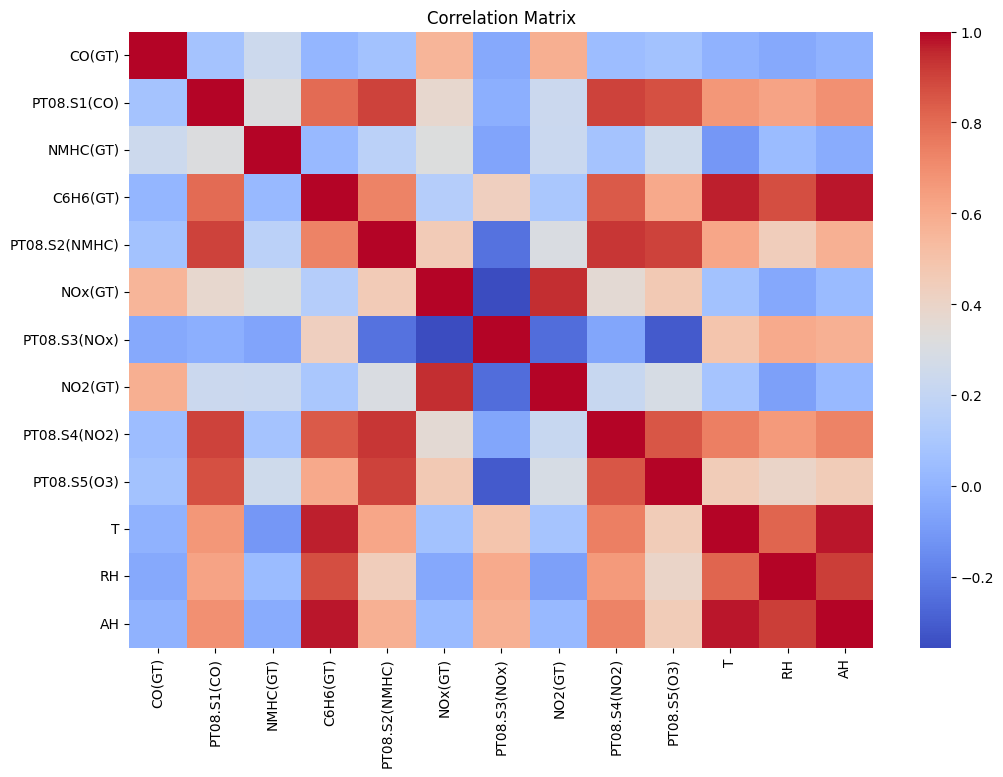

In [76]:



# Now calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = air_quality_data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


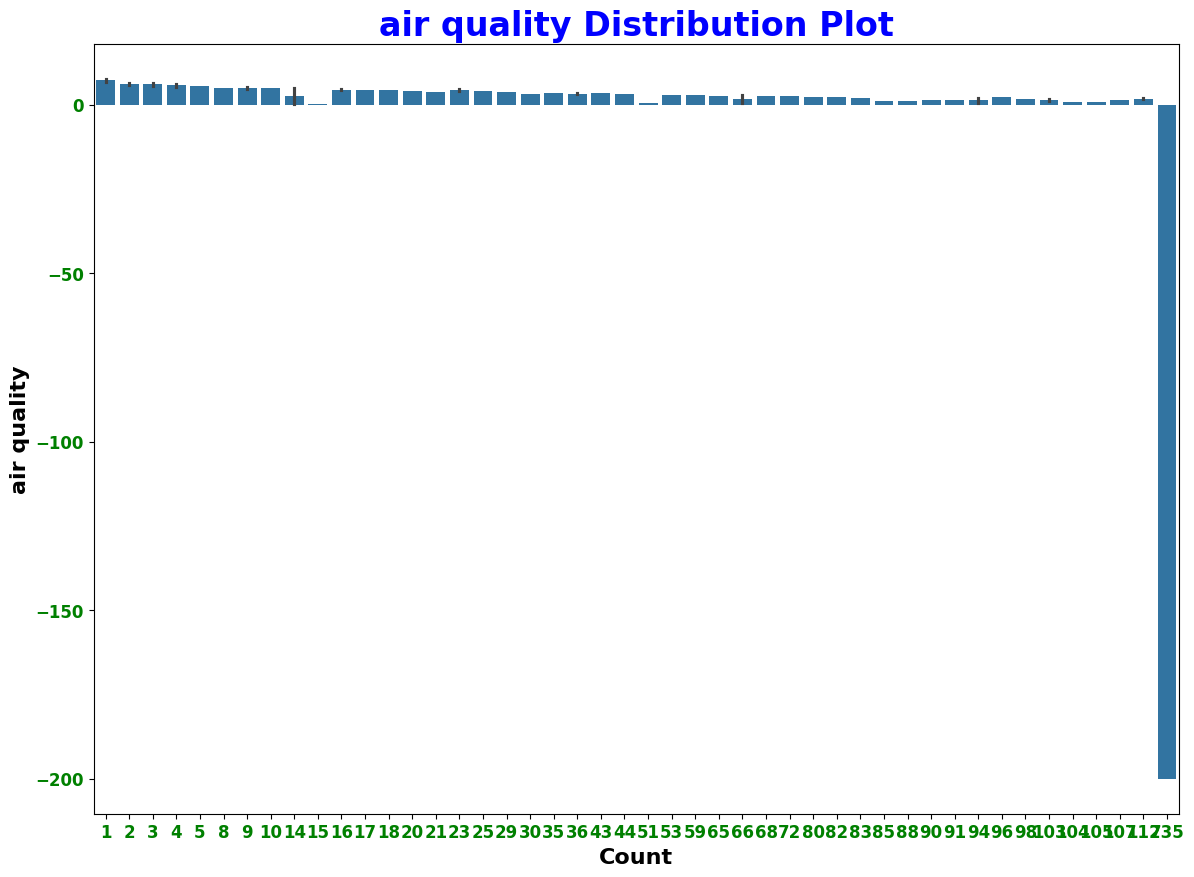

In [77]:

plt.figure(figsize = (14,10))
# Use the correct variable name air_quality_data and specify a column if needed
count1 = air_quality_data['CO(GT)'].value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'v')
plt.xlabel('Count', fontsize = 16, fontweight = 'bold')
plt.ylabel('air quality', fontsize = 16, fontweight = 'bold')
plt.title('air quality Distribution Plot', fontsize = 24, fontweight = 'bold', color = 'blue')
plt.xticks( fontsize = 12, fontweight = 'bold', color = 'green')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'green')
plt.show()


In [78]:
air_quality_data['Time'] = air_quality_data['Time'].str.replace('.', ':', regex=False)

In [79]:
air_quality_data['Datetime'] = pd.to_datetime(air_quality_data['Date'] + ' ' + air_quality_data['Time'], dayfirst=True, errors='coerce')
air_quality_data.dropna(subset=['Datetime'], inplace=True)
air_quality_data.set_index('Datetime', inplace=True)

In [80]:
air_quality_data.drop(columns=['Date', 'Time'], inplace=True)

In [83]:
X = air_quality_data.drop(columns=['CO(GT)'])
y = air_quality_data['CO(GT)']

In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [86]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [87]:
y_pred = model.predict(X_test)

In [88]:
y_pred = model.predict(X_test)

In [89]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [90]:
r2 = r2_score(y_test, y_pred)

print("RMSE:", round(rmse, 3))
print("R² Score:", round(r2, 3))

RMSE: 51.513
R² Score: 0.589


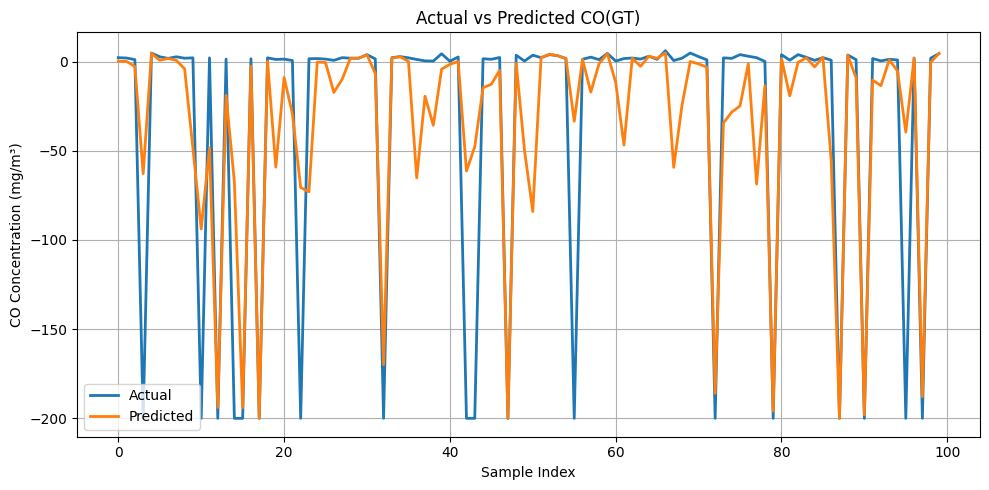

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(y_pred[:100], label='Predicted', linewidth=2)
plt.title('Actual vs Predicted CO(GT)')
plt.xlabel('Sample Index')
plt.ylabel('CO Concentration (mg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
